#4.Learning/ Modelling:  Multiple ML approaches

In [5]:
import pandas as pd
import numpy as np
import pickle
import gc
from sklearn.linear_model import LinearRegression
import gc
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#!pip install xgboost

In [16]:
!pip3 install pickle5
import pickle5 as pickle
with open ("newdf_completeMy.pkl","rb") as fh:
    df = pickle.load(fh)

In [4]:
#read pkl file
#path='df_completeMy_en.pkl'
#f=open(path,'rb')
#df= pickle.load(f)

In [8]:
X_train = df[df.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = df[df.date_block_num < 33]['item_cnt_month']
X_valid = df[df.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = df[df.date_block_num == 33]['item_cnt_month']
X_test = df[df.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [9]:
Y_train = Y_train.clip(0, 20)
Y_valid = Y_valid.clip(0, 20)

In [10]:
del df
gc.collect();

# xgboost

In [9]:
import time
from xgboost import XGBRegressor
ts = time.time()

xgb = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

xgb.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 5)

time.time() - ts

[0]	validation_0-rmse:1.15310	validation_1-rmse:1.11646
[1]	validation_0-rmse:1.10368	validation_1-rmse:1.07845


KeyboardInterrupt: 

random search

In [8]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [9]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
# tuning parameters with 
param_test = {
 #'max_depth':list(range(3,10,2)),
 #'max_depth': [3,5],
 #'min_child_weight':list(range(1,6,2))
    'max_depth': [3,6,9],
    'min_child_weight': [0.01,0.1,0.5]
    
    }
estimator = XGBRegressor(
    n_estimators=100,
    min_child_weight=1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42
)

folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

gsearch = RandomizedSearchCV(estimator=estimator, 
                             n_iter = param_comb, 
                             param_distributions = param_test, 
                             scoring='neg_mean_squared_error', 
                             cv=skf.split(X_train,Y_train), 
                             verbose=3, 
                             n_jobs=4,
                             random_state=1001
                    ) 

start_time = timer(None)
gsearch.fit(X_train, Y_train)
timer(start_time)

print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

gsearch.best_params_, gsearch.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [12]:
print('参数的最佳取值:{0}'.format(gsearch.best_params_))
print('最佳模型得分:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

gsearch.best_params_, gsearch.best_score_

参数的最佳取值:{'min_child_weight': 0.1, 'max_depth': 9}
最佳模型得分:-0.607435961564382
[-0.60743596 -0.77178315 -0.60743596 -0.77178315 -0.68263612]
[{'min_child_weight': 0.1, 'max_depth': 9}, {'min_child_weight': 0.5, 'max_depth': 3}, {'min_child_weight': 0.01, 'max_depth': 9}, {'min_child_weight': 0.1, 'max_depth': 3}, {'min_child_weight': 0.5, 'max_depth': 6}]


({'min_child_weight': 0.1, 'max_depth': 9}, -0.607435961564382)

In [18]:
param_test1 = {
    'gamma': [0,0.2,0.4,0.6,0.8]
    }
estimator1 = XGBRegressor(
    n_estimators=100,
    max_depth = 9,
    min_child_weight=0.1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42
)
                        
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

gsearch1 = RandomizedSearchCV(estimator=estimator1, 
                             n_iter = param_comb, 
                             param_distributions = param_test1, 
                             scoring='neg_mean_squared_error', 
                             cv=skf.split(X_train,Y_train), 
                             verbose=3, 
                             n_jobs=4,
                             random_state=1001
                    ) 
start_time = timer(None)
gsearch1.fit(X_train, Y_train)
timer(start_time)

print('参数的最佳取值:{0}'.format(gsearch1.best_params_))
print('最佳模型得分:{0}'.format(gsearch1.best_score_))
print(gsearch1.cv_results_['mean_test_score'])
print(gsearch1.cv_results_['params'])

gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits

 Time taken: 13 hours 30 minutes and 16.76 seconds.
参数的最佳取值:{'gamma': 0.8}
最佳模型得分:-0.6070724129676819
[-0.60743596 -0.60903841 -0.60779506 -0.60842947 -0.60707241]
[{'gamma': 0}, {'gamma': 0.2}, {'gamma': 0.4}, {'gamma': 0.6}, {'gamma': 0.8}]


({'gamma': 0.8}, -0.6070724129676819)

# Model and submit

In [13]:
import time
from xgboost import XGBRegressor
ts = time.time()

xgb = XGBRegressor(
    max_depth=9,
    n_estimators=1000,
    min_child_weight=0.1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,    
    seed=42,
    #num_leaves= 1023,
    #min_data_in_leaf=10,
    #feature_fraction=0.7,
    learning_rate= 0.05, 
    #early_stopping_rounds = 20,
    gamma = 0.8
)

xgb.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 5)

time.time() - ts

[0]	validation_0-rmse:1.18696	validation_1-rmse:1.13979
[1]	validation_0-rmse:1.15619	validation_1-rmse:1.11909
[2]	validation_0-rmse:1.13190	validation_1-rmse:1.09968
[3]	validation_0-rmse:1.10988	validation_1-rmse:1.08208
[4]	validation_0-rmse:1.08700	validation_1-rmse:1.06589
[5]	validation_0-rmse:1.06612	validation_1-rmse:1.05106
[6]	validation_0-rmse:1.04891	validation_1-rmse:1.03898
[7]	validation_0-rmse:1.03294	validation_1-rmse:1.02649
[8]	validation_0-rmse:1.01801	validation_1-rmse:1.01538
[9]	validation_0-rmse:1.00267	validation_1-rmse:1.00581
[10]	validation_0-rmse:0.98850	validation_1-rmse:0.99640
[11]	validation_0-rmse:0.97432	validation_1-rmse:0.98818
[12]	validation_0-rmse:0.96247	validation_1-rmse:0.97996
[13]	validation_0-rmse:0.95118	validation_1-rmse:0.97317
[14]	validation_0-rmse:0.94183	validation_1-rmse:0.96657
[15]	validation_0-rmse:0.93316	validation_1-rmse:0.96105
[16]	validation_0-rmse:0.92507	validation_1-rmse:0.95559
[17]	validation_0-rmse:0.91545	validation

644.4925720691681

In [14]:
test = pd.read_csv('test.csv')
Y_pred = xgb.predict(X_valid).clip(0, 20)
Y_test = xgb.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission4.csv', index=False)

# extratrees

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import accuracy_score

In [32]:
import time
ts = time.time()

model=ExtraTreesRegressor(random_state=10, max_depth = 9, n_estimators=50, min_samples_split=10, min_samples_leaf = 40, verbose=True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

time.time() - ts

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 22.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


1373.302078962326

In [34]:
import time
ts = time.time()

model=ExtraTreesRegressor(random_state=10, n_estimators=50, verbose=True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

time.time() - ts

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
test = pd.read_csv('test.csv')
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('ext_submissionoriginal.csv', index=False)

# GB

In [22]:
df.head()

,date_block_num,shop_id,item_id,item_cnt_month,category_id,cat_type_code,cat_subtype_code,shop_city_code,shop_type_code,item_cnt_month_lag_1,...,date_shop_subtype_avg_item_cnt_lag_2,date_shop_subtype_avg_item_cnt_lag_3,date_shop_subtype_avg_item_cnt_lag_6,date_shop_subtype_avg_item_cnt_lag_12,delta_price_lag,month,days,item_shop_last_sale,item_shop_first_sale,item_first_sale
4488710,12,2,27,0.0,19,8,46,0,0,0.0,...,0.521973,0.634766,0.552246,0.519043,-0.282715,0,31,1,12,12
4488711,12,2,30,0.0,40,5,22,0,0,0.0,...,0.022934,0.021286,0.038971,0.000000,-0.483398,0,31,1,11,11
4488712,12,2,31,0.0,37,5,10,0,0,0.0,...,0.048462,0.035156,0.026535,0.000000,-0.137451,0,31,1,11,11
4488713,12,2,32,1.0,40,5,22,0,0,0.0,...,0.022934,0.021286,0.038971,0.073120,-0.407227,0,31,-1,12,12
4488714,12,2,33,1.0,37,5,10,0,0,1.0,...,0.048462,0.035156,0.026535,0.085632,-0.225464,0,31,1,12,12


In [23]:
import matplotlib.pyplot as plt

corr = df.corr('pearson')    # .corr('spearman')
plt.figure(figsize=(25, 15))
corr.sort_values(ascending=False)[1:].plot(kind='bar')
plt.tight_layout()

TypeError: sort_values() missing 1 required positional argument: 'by'

<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

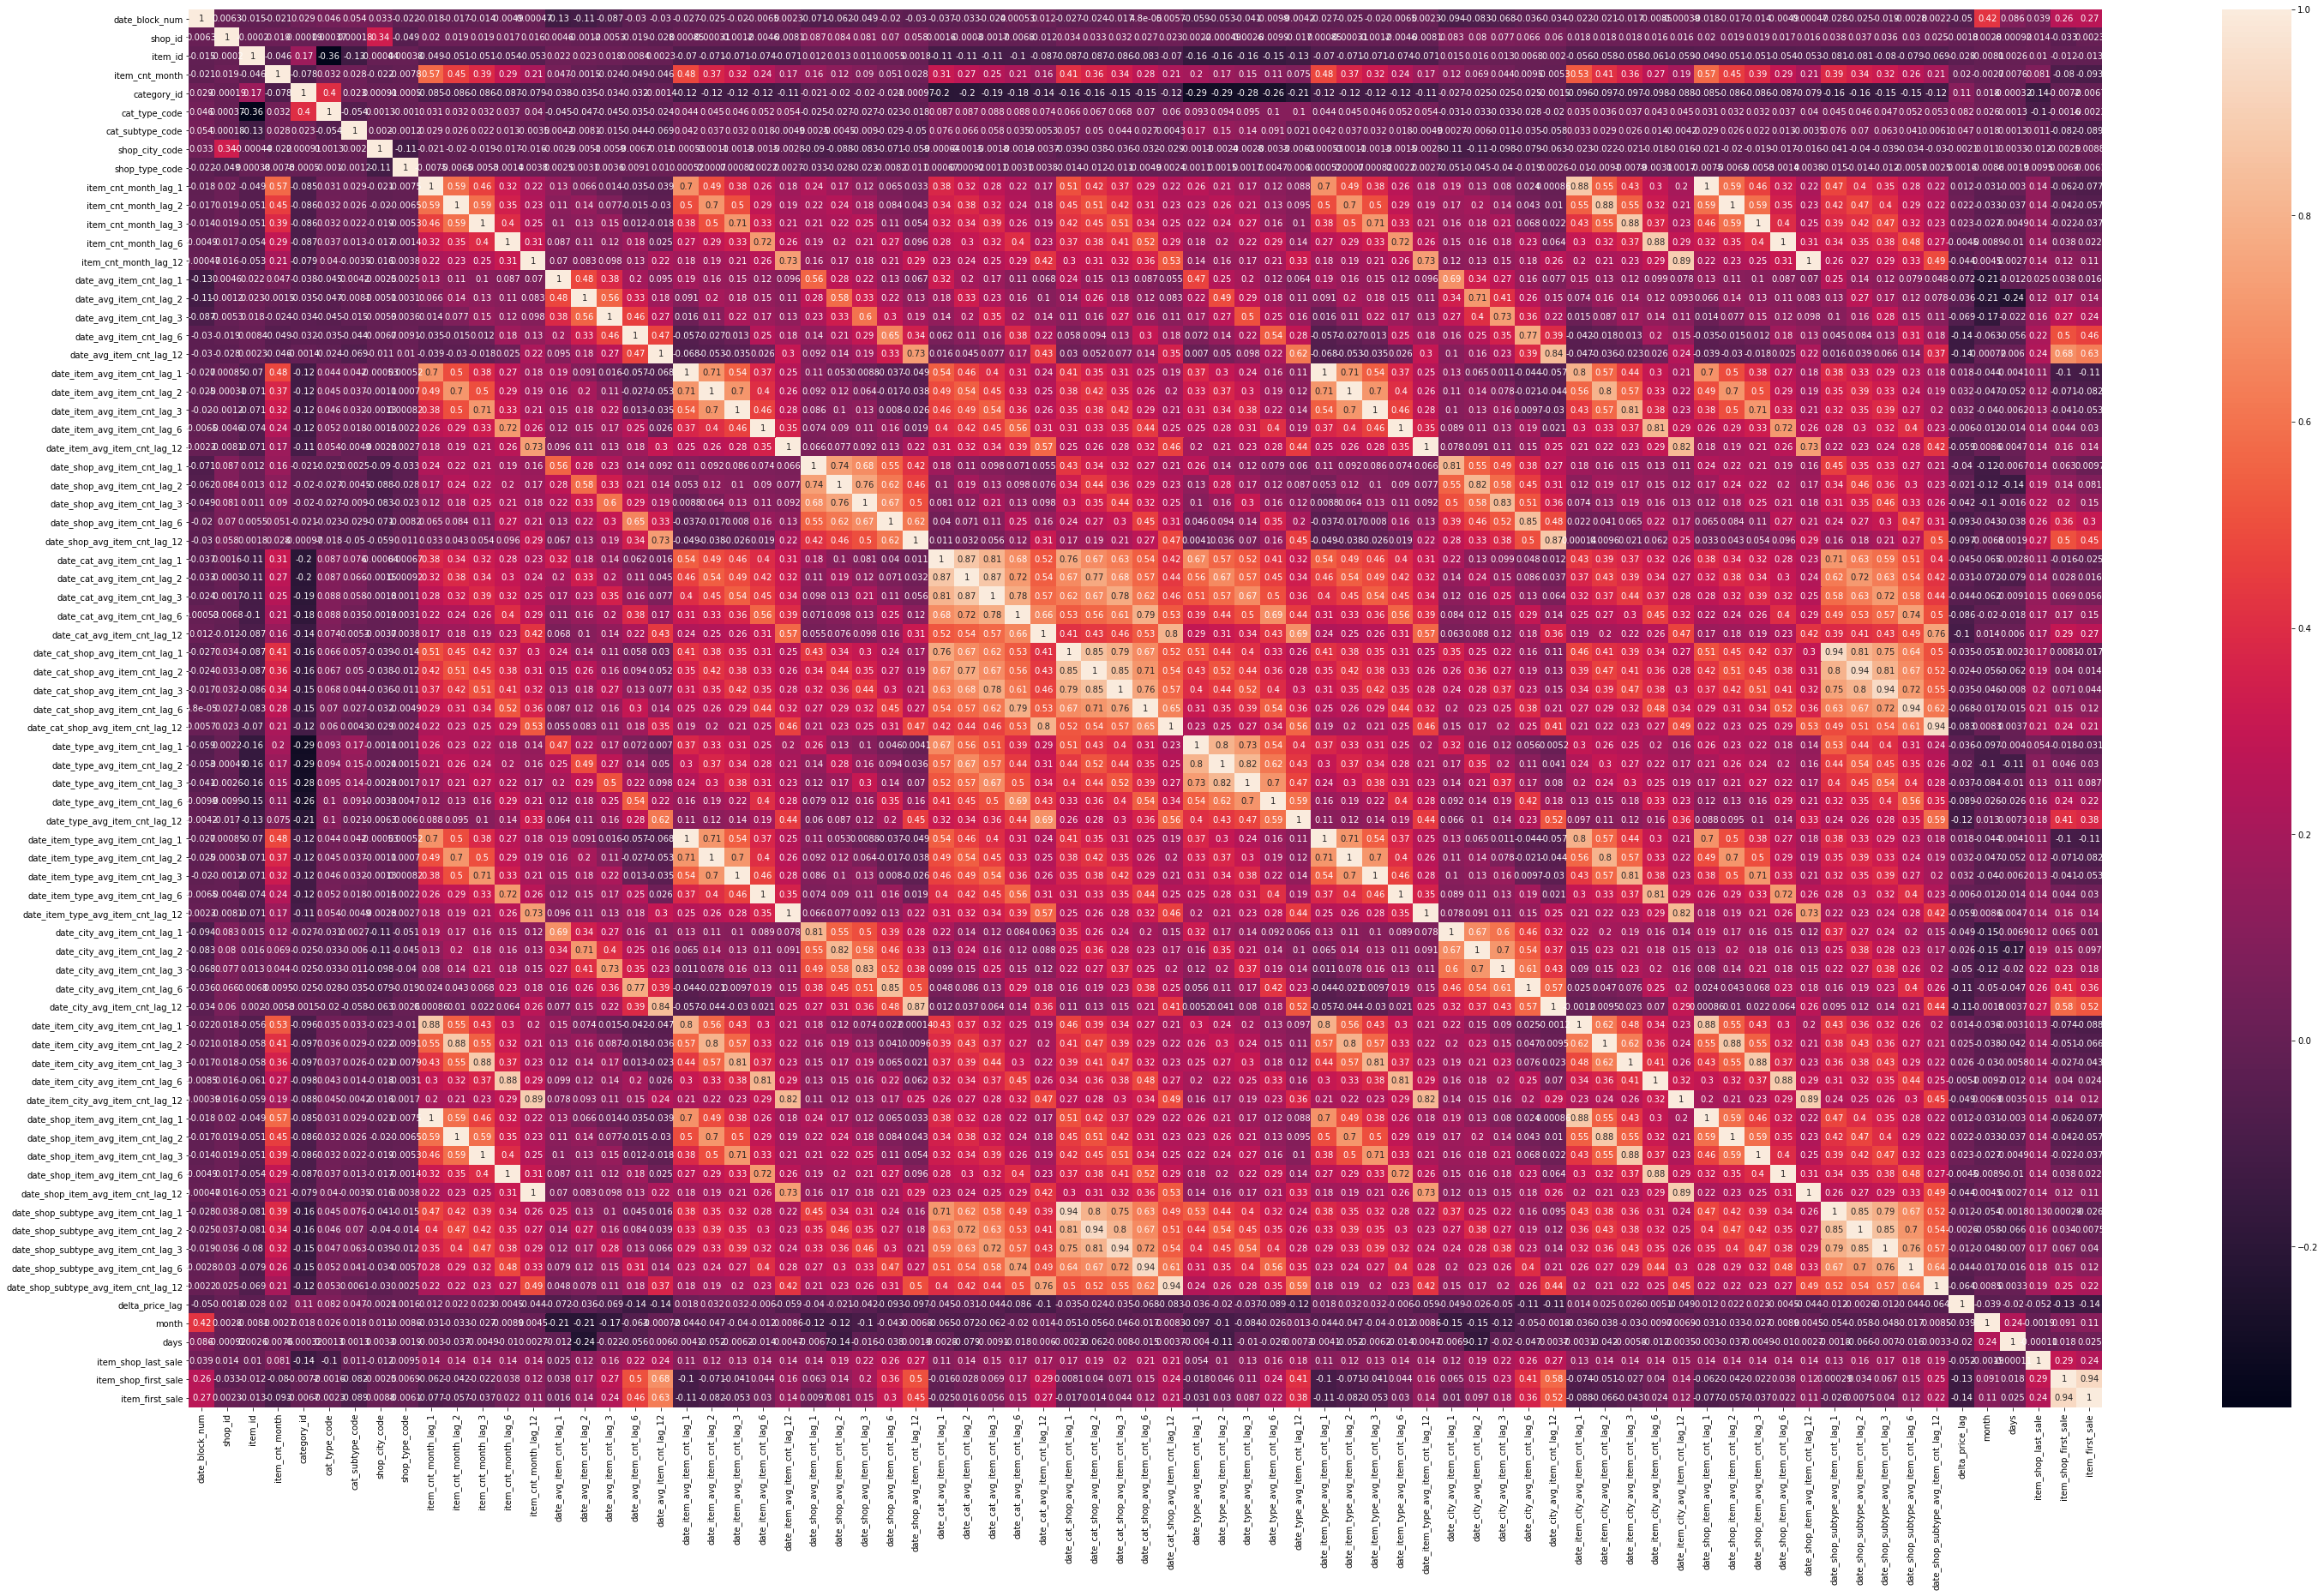

In [24]:
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(corr, annot=True)

NameError: name 'train_dataset' is not defined

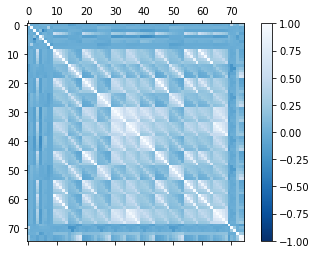

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Blues_r', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_dataset.columns)
ax.set_yticklabels(train_dataset.columns)
plt.show()

#5.Prediction

#6.Output and Submission

xgboost 1st 0.92341

#7.Analysing model output